<a href="https://colab.research.google.com/github/paulopetrillo/FIAP_TECH_CHALENGE_01/blob/TECH_VIVIAN/Tech_Vivian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
# Carregar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
# Baixar dados históricos do IBOV (desde 2010 até hoje)
dat = yf.Ticker("^BVSP")
df = dat.history(start="2010-01-01", end="2025-08-10")

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-02:00,68587.0,70081.0,68587.0,70045.0,1655400,0.0,0.0
2010-01-05 00:00:00-02:00,70046.0,70595.0,69928.0,70240.0,1984200,0.0,0.0
2010-01-06 00:00:00-02:00,70237.0,70937.0,70016.0,70729.0,2243600,0.0,0.0
2010-01-07 00:00:00-02:00,70723.0,70723.0,70045.0,70451.0,1555000,0.0,0.0
2010-01-08 00:00:00-02:00,70455.0,70766.0,70158.0,70263.0,1634400,0.0,0.0


In [ ]:
# Garantir que o índice é datetime
df.index = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-02:00,68587.0,70081.0,68587.0,70045.0,1655400,0.0,0.0
2010-01-05 00:00:00-02:00,70046.0,70595.0,69928.0,70240.0,1984200,0.0,0.0
2010-01-06 00:00:00-02:00,70237.0,70937.0,70016.0,70729.0,2243600,0.0,0.0
2010-01-07 00:00:00-02:00,70723.0,70723.0,70045.0,70451.0,1555000,0.0,0.0
2010-01-08 00:00:00-02:00,70455.0,70766.0,70158.0,70263.0,1634400,0.0,0.0


## Análise exploratória

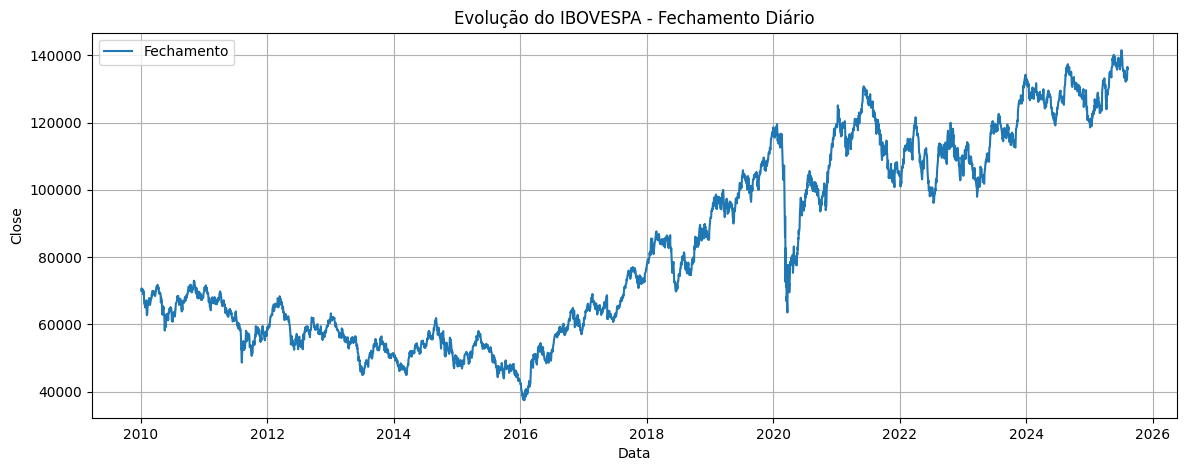

In [ ]:
# Resetar índice
df = df.reset_index()
df.head()

# Plot fechamento
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Close'], label='Fechamento')
plt.title('Evolução do IBOVESPA - Fechamento Diário')
plt.xlabel('Data')
plt.ylabel('Close')
plt.grid(True)
plt.legend()
plt.show()

## Decomposição da série temporal (tendência, sazonalidade e ruído)

<Figure size 1200x1000 with 0 Axes>

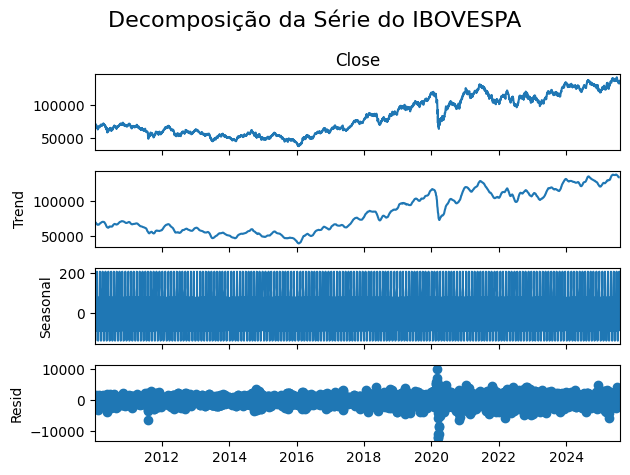

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Baixar dados históricos do IBOVESPA
df = dat.history(start="2010-01-01", end="2025-08-10", interval="1d")

# 2. Garantir que o índice é datetime
df.index = pd.to_datetime(df.index)

# 3. Selecionar apenas a coluna de fechamento
serie = df['Close'].dropna()

# 4. Decomposição da série (modo aditivo)
decomp = seasonal_decompose(serie, model='additive', period=21)  # ~21 dias úteis por mês

# 5. Plotar resultado
plt.figure(figsize=(12, 10))
decomp.plot()
plt.suptitle('Decomposição da Série do IBOVESPA', fontsize=16)
plt.tight_layout()
plt.show()


Aprofundar a análise estatística da série temporal para entender se ela é estacionária, como estão os resíduos, e se há autocorrelação que os modelos precisam aprender

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Usando a série de fechamento
serie = df['Close'].dropna()

# Teste ADF
resultado_adf = adfuller(serie)

print("📌 Resultado do Teste de Dickey-Fuller (ADF):")
print(f"ADF Statistic: {resultado_adf[0]:.4f}")
print(f"p-value: {resultado_adf[1]:.4f}")
print("Valores críticos:")
for key, value in resultado_adf[4].items():
    print(f"  {key}: {value:.4f}")


📌 Resultado do Teste de Dickey-Fuller (ADF):
ADF Statistic: -0.6581
p-value: 0.8573
Valores críticos:
  1%: -3.4320
  5%: -2.8623
  10%: -2.5672


p-value < 0.05 → A série é estacionária (boa para modelos lineares, ARIMA, etc.).

p-value ≥ 0.05 → A série não é estacionária

Todos os valores críticos negativos também indica ausência de estacionariedade

===============================================================================

Plotar Autocorrelação (ACF) e Parcial (PACF)

Isso mostra se os valores atuais estão correlacionados com valores passados (lags).

Se há autocorrelações significativas nos primeiros lags, isso indica que o modelo pode usar lags como variáveis preditoras.

Se não houver autocorrelação significativa, talvez a série seja mais aleatória.

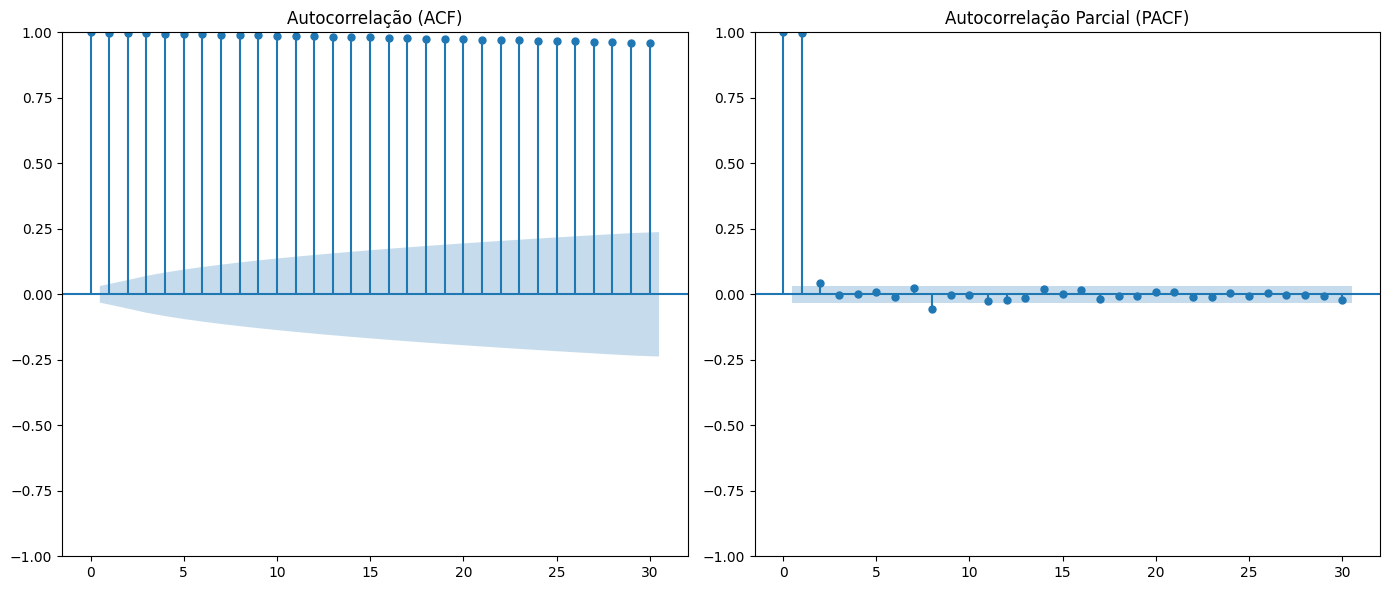

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(serie.dropna(), lags=30, ax=plt.gca())
plt.title("Autocorrelação (ACF)")

plt.subplot(1, 2, 2)
plot_pacf(serie.dropna(), lags=30, ax=plt.gca(), method='ywm')
plt.title("Autocorrelação Parcial (PACF)")

plt.tight_layout()
plt.show()


ACF	Autocorrelação - Correlação da série com ela mesma em diferentes lags

PACF	Autocorrelação Parcial - Correlação da série com seus lags, eliminando influências intermediárias

Interpretação dos Valores
- ACF:

Os valores da ACF caem muito lentamente até o lag 30.

Isso indica forte autocorrelação de longo prazo, sugerindo tendência.

- PACF:

O lag 1 tem PACF ≈ 0.99 → muito forte autocorrelação imediata.

Os lags seguintes têm PACF muito baixos e até negativos → indica que a maior parte da dependência é no lag 1.

Depois do lag 1, os PACFs oscilam próximos de 0 (nenhuma contribuição relevante)

In [ ]:
# ======================
# Modelos AR, MA e ARIMA
# ======================
# AR(p) (AutoRegressive): o valor atual depende de seus próprios valores passados (p lags).
# MA(q) (Moving Average): o valor atual depende de erros passados (q lags).
# ARIMA(p,d,q): combinação de AR e MA (com diferenciação d).
#========================================================================

# =================
# Uso do ACF e PACF
# =================

# Para AR(p) :
# O PACF mostra um corte abrupto (decai para zero) após o lag p.
# O ACF decai lentamente (geralmente exponencial ou oscilatório).
# Ex.: Se PACF tem picos até lag 2 e depois some → provável AR(2).

# Para MA(q):
# O ACF mostra um corte abrupto após o lag q.
# O PACF decai lentamente.
# Ex.: Se ACF tem picos até lag 1 → provável MA(1).

# Para ARMA(p,q):
# Tanto ACF quanto PACF decaem gradualmente, sem corte claro.

================================

## Testando o Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Baixar dados históricos do IBOV (desde 2010 até hoje)
df = dat.history(start="2010-01-01", end="2025-08-10")

# 2. Selecionar apenas a coluna de fechamento
df = df[['Close']].copy()

# 3. Criar coluna com direção: 1 se fechamento do dia seguinte > fechamento do dia atual, 0 caso contrário
df['Direction'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# 4. Criar features lagged (lags dos preços de fechamento dos últimos 5 dias)
for lag in range(1, 6):
    df[f'lag_{lag}'] = df['Close'].shift(lag)

# 5. Remover linhas com valores NaN gerados pelos lags e pelo shift da direção
df.dropna(inplace=True)

# 6. Separar conjunto treino (tudo menos último mês) e teste (últimos 30 dias)
train = df.iloc[:-30]
test = df.iloc[-30:]

# 7. Definir X (features) e y (target) para treino e teste
feature_cols = [f'lag_{lag}' for lag in range(1,6)]
X_train = train[feature_cols]
y_train = train['Direction']
X_test = test[feature_cols]
y_test = test['Direction']

# 8. Treinar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Fazer previsões no conjunto teste
y_pred = model.predict(X_test)

# 10. Avaliar desempenho
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia no último mês: {acc:.2%}")

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia no último mês: 46.67%

Matriz de Confusão:
[[ 5 12]
 [ 4  9]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.56      0.29      0.38        17
           1       0.43      0.69      0.53        13

    accuracy                           0.47        30
   macro avg       0.49      0.49      0.46        30
weighted avg       0.50      0.47      0.45        30



Confusion Matrix:
[[ 5 12]
 [ 4  9]]


Text(0.5, 1.0, 'Modelo: Regresão Logística com Dados Balanceados')

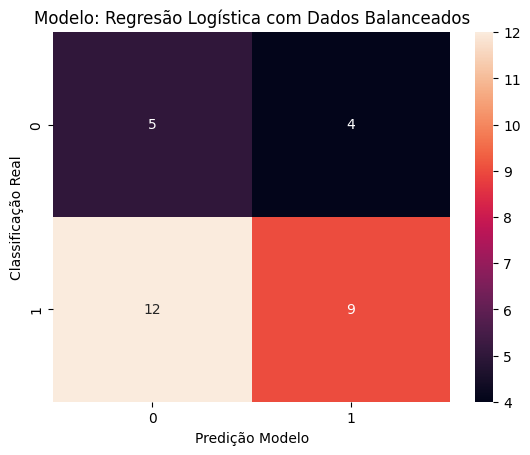

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cm = metrics.confusion_matrix(y_pred, y_test)

sns.heatmap(cm, annot=True, fmt='.0f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )

plt.ylabel('Classificação Real')
plt.xlabel('Predição Modelo')
plt.title('Modelo: Regresão Logística com Dados Balanceados')

================================================================================

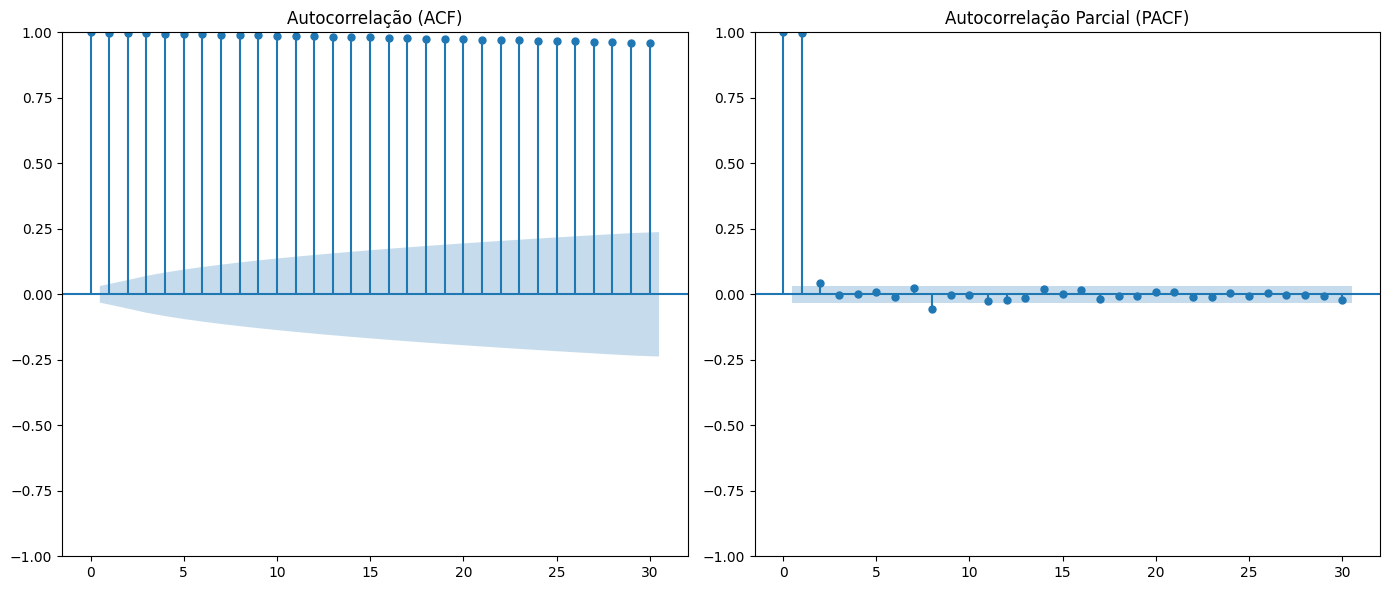

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(serie.dropna(), lags=30, ax=plt.gca())
plt.title("Autocorrelação (ACF)")

plt.subplot(1, 2, 2)
plot_pacf(serie.dropna(), lags=30, ax=plt.gca(), method='ywm')
plt.title("Autocorrelação Parcial (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=b54ce3e77b86604aab3079f62fb139a0b7d6d73324bd767aaf1c8facde24a2c8
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from ta.momentum import RSIIndicator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Baixar dados
df = dat.history(start="2022-01-01", end="2025-08-10")

# 2. Criar features técnicas

# Retornos diários
df['return'] = df['Close'].pct_change()

# Média móvel de 5 e 10 dias
df['ma5'] = df['Close'].rolling(window=5).mean()
df['ma10'] = df['Close'].rolling(window=10).mean()

# RSI 14 dias
rsi = RSIIndicator(close=df['Close'], window=14)
df['rsi'] = rsi.rsi()

# 3. Criar lags (exemplo 1 a 3 dias) da variável 'return' e 'rsi'
for lag in range(1, 4):
    df[f'return_lag_{lag}'] = df['return'].shift(lag)
    df[f'rsi_lag_{lag}'] = df['rsi'].shift(lag)

# 4. Criar target: direção do fechamento no próximo dia (1=alta, 0=baixa)
df['target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# 5. Remover linhas com NaN gerados pelas features lag e target
df.dropna(inplace=True)

# 6. Selecionar features e target
features = ['return', 'ma5', 'ma10', 'rsi',
            'return_lag_1', 'return_lag_2', 'return_lag_3',
            'rsi_lag_1', 'rsi_lag_2', 'rsi_lag_3']

X = df[features]
y = df['target']

# 7. Dividir treino/teste: últimos 30 dias para teste
train_X = X.iloc[:-30]
train_y = y.iloc[:-30]

test_X = X.iloc[-30:]
test_y = y.iloc[-30:]

# 8. Treinar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train_X, train_y)

# 9. Prever e avaliar
pred = model.predict(test_X)

acc = accuracy_score(test_y, pred)
print(f"Acurácia no último mês: {acc:.2%}")

print("\nMatriz de Confusão:")
print(confusion_matrix(test_y, pred))

print("\nRelatório de Classificação:")
print(classification_report(test_y, pred))


Acurácia no último mês: 60.00%

Matriz de Confusão:
[[13  4]
 [ 8  5]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        17
           1       0.56      0.38      0.45        13

    accuracy                           0.60        30
   macro avg       0.59      0.57      0.57        30
weighted avg       0.59      0.60      0.58        30



Confusion Matrix:
[[13  4]
 [ 8  5]]


Text(0.5, 1.0, 'Modelo: Regresão Logística com Dados Balanceados')

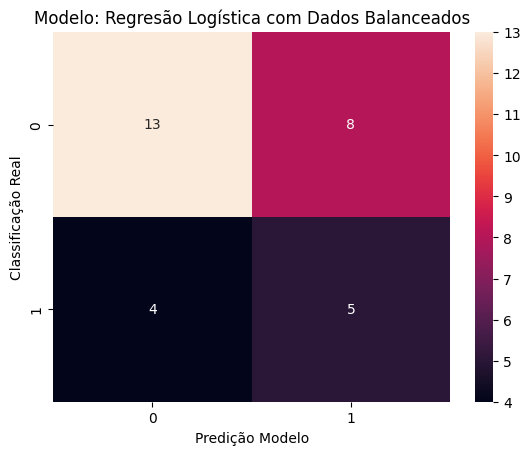

In [ ]:
cm_RF = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm_RF)

cm_RF = metrics.confusion_matrix(pred, y_test)

sns.heatmap(cm_RF, annot=True, fmt='.0f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )

plt.ylabel('Classificação Real')
plt.xlabel('Predição Modelo')
plt.title('Modelo: Regresão Logística com Dados Balanceados')

Ao invés de prever apenas a direção, tentar prever uma variação significativa (ex: se o preço vai subir/cair mais que 0.2%).

Isso pode reduzir o impacto do ruído nos movimentos marginais de preço.

In [ ]:
import yfinance as yf
import pandas as pd
from ta.trend import MACD, SMAIndicator
from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Carrega dados
dat = yf.Ticker("^BVSP")
df = dat.history(start="2012-01-01", end="2025-08-17")
df.dropna(inplace=True)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.reset_index(inplace=True)

# Calcula indicadores técnicos
rsi = RSIIndicator(close=df['Close'], window=14)
df['RSI'] = rsi.rsi()

macd = MACD(close=df['Close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()

df['SMA_5'] = SMAIndicator(close=df['Close'], window=5).sma_indicator()
df['SMA_10'] = SMAIndicator(close=df['Close'], window=10).sma_indicator()

bb = BollingerBands(close=df['Close'], window=20, window_dev=2)
df['BB_upper'] = bb.bollinger_hband()
df['BB_lower'] = bb.bollinger_lband()
df['BB_range'] = df['BB_upper'] - df['BB_lower']

# Remover valores nulos criados pelos indicadores
df.dropna(inplace=True)

import numpy as np

# Retornos logarítmicos diários
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

# Retornos logarítmicos lagged
for lag in [1, 2, 3]:
    df[f'Log_Return_lag_{lag}'] = df['Log_Return'].shift(lag)

# Diferença entre médias móveis
df['SMA_diff'] = df['SMA_5'] - df['SMA_10']

# Remove linhas com NaN gerados pelo shift
df.dropna(inplace=True)


# Target: fechamento do próximo dia subiu mais de 0.3%
df['Target'] = ((df['Close'].shift(-1) - df['Close']) / df['Close'] > 0.003).astype(int)
df = df[:-1]

# Features e target
features = ['RSI', 'MACD', 'MACD_signal', 'SMA_5', 'SMA_10', 'BB_upper', 'BB_lower', 'BB_range',
            'Log_Return_lag_1', 'Log_Return_lag_2', 'Log_Return_lag_3', 'SMA_diff'
]

X = df[features]
y = df['Target']

# Split treino e teste (últimos 30 dias teste)
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# Aplica SMOTE no treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Treina modelo
modelo_rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
modelo_rf.fit(X_train_smote, y_train_smote)

# Avalia no teste
y_pred = modelo_rf.predict(X_test)

print(f"Acurácia com Random Forest + SMOTE (últimos 30 dias): {accuracy_score(y_test, y_pred):.2%}")
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))


Acurácia com Random Forest + SMOTE (últimos 30 dias): 76.67%
Matriz de confusão:
[[20  2]
 [ 5  3]]
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.60      0.38      0.46         8

    accuracy                           0.77        30
   macro avg       0.70      0.64      0.66        30
weighted avg       0.75      0.77      0.75        30



Confusion Matrix:
[[20  5]
 [ 2  3]]


Text(0.5, 1.0, 'Modelo: Regresão Logística com Dados Balanceados')

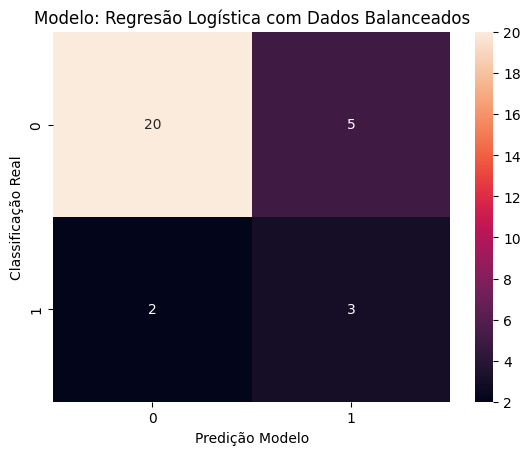

In [ ]:
cm_RF_Smoth = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:")
print(cm_RF_Smoth)

cm_RF_Smoth = metrics.confusion_matrix(y_pred, y_test)

sns.heatmap(cm_RF_Smoth, annot=True, fmt='.0f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )

plt.ylabel('Classificação Real')
plt.xlabel('Predição Modelo')
plt.title('Modelo: Regresão Logística com Dados Balanceados')